In [15]:
import os, shutil
first_dataset_dir = '../datasets/train1'
second_dataset_dir = '../datasets/train2'
third_dataset_dir = '../datasets/train3'
fourth_dataset_dir = '../datasets/train4'
fifth_dataset_dir = '../datasets/train5'
test_dataset_dir = '../datasets/test'

In [16]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 244

train_ds1 = image_dataset_from_directory(first_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
# 6 % 5 + 1 = 2
val_ds2 = image_dataset_from_directory(second_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds3 = image_dataset_from_directory(third_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds4 = image_dataset_from_directory(fourth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds5 = image_dataset_from_directory(fifth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
test_ds = image_dataset_from_directory(test_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [17]:
print (type(train_ds1))
print (train_ds1.class_names)

full_train_ds = train_ds1.concatenate(train_ds3).concatenate(train_ds4).concatenate(train_ds5)

# Even if we switch datatypes back to the original
# Methods like class_names are not available
# So we keep it as "concatenated dataset" instead of "prefetch dataset"
# full_train_ds = full_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# print (full_train_ds.class_names)
print (type(full_train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
['000_airplane', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '009_truck']
<class 'tensorflow.python.data.ops.concatenate_op._ConcatenateDataset'>


In [18]:
for data_batch, labels_batch in full_train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 244, 244, 3)
labels batch shape: (32, 10)


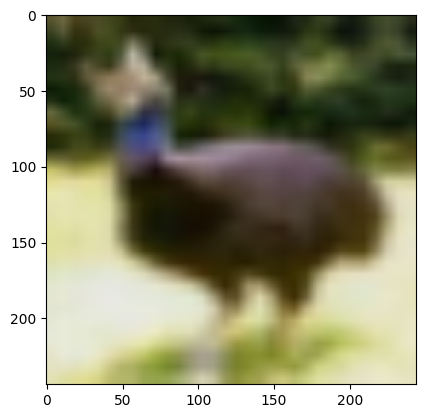

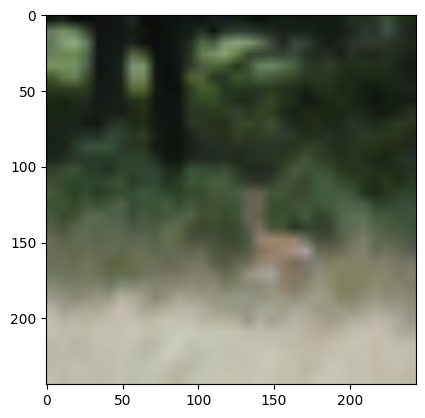

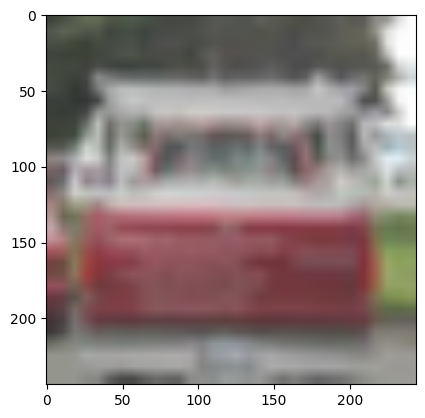

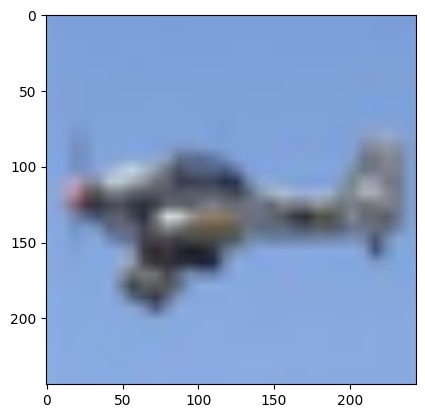

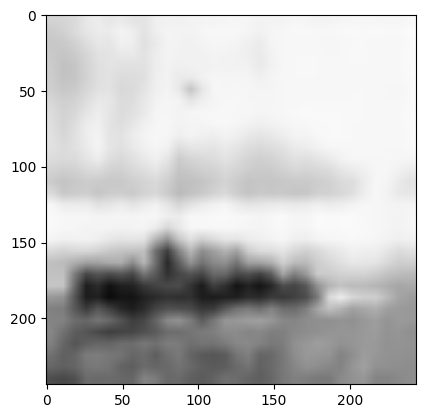

In [19]:
import matplotlib.pyplot as plt
for data_batch, _ in full_train_ds.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
#conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
#conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
conv_base.trainable = False
# testar resnet50

In [21]:
from tensorflow import keras
from keras import layers
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2),])
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [12]:
model.compile( loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history = model.fit(full_train_ds, epochs=50, validation_data=val_ds2)

Epoch 1/50
  57/1252 [>.............................] - ETA: 1:36:47 - loss: 54.6710 - accuracy: 0.5685

KeyboardInterrupt: 